<a href="https://colab.research.google.com/github/pooja-parsana/hotel_booking_analysis/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing libraries**

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

import warnings 
warnings.filterwarnings('ignore')

**Mount the drive and loading dataset from drive**

In [ ]:
#importing csv file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path of dataset and data frame
path='/content/drive/MyDrive/AlmaBetter/Cohort Rimo/capstone project 2/SeoulBikeData.csv'
dataframe=pd.read_csv(path, encoding='ISO-8859-1')

In [ ]:
#creating copy of data frame
df=dataframe.copy()

In [ ]:
#renaming columns
df.rename(columns={'Rented Bike Count': 'RentedBikeCount','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility',
 'Dew point temperature(°C)': 'DewPointTemperature', 'Solar Radiation (MJ/m2)':'SolarRadiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
 'Functioning Day':'FunctioningDay','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

# **Understand more about the data**

**Date** : The date of the day,in formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m)**: Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: Season of the year, type : str, there are only 4 season's in data .

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

In [ ]:
#display first 10 rows
df.head(10)

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#disply last five rows 
df.tail()

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# to get datatypes of each columns
df.dtypes

Date                    object
RentedBikeCount          int64
Hour                     int64
Temperature            float64
Humidity                 int64
WindSpeed              float64
Visibility               int64
DewPointTemperature    float64
SolarRadiation         float64
Rainfall               float64
Snowfall               float64
Seasons                 object
Holiday                 object
FunctioningDay          object
dtype: object

In [ ]:
#displaying name of columns
df.columns

Index(['Date', 'RentedBikeCount', 'Hour', 'Temperature', 'Humidity',
       'WindSpeed', 'Visibility', 'DewPointTemperature', 'SolarRadiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'FunctioningDay'],
      dtype='object')

In [ ]:
#checking some statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RentedBikeCount,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
WindSpeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
DewPointTemperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
SolarRadiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 8760 non-null   object 
 1   RentedBikeCount      8760 non-null   int64  
 2   Hour                 8760 non-null   int64  
 3   Temperature          8760 non-null   float64
 4   Humidity             8760 non-null   int64  
 5   WindSpeed            8760 non-null   float64
 6   Visibility           8760 non-null   int64  
 7   DewPointTemperature  8760 non-null   float64
 8   SolarRadiation       8760 non-null   float64
 9   Rainfall             8760 non-null   float64
 10  Snowfall             8760 non-null   float64
 11  Seasons              8760 non-null   object 
 12  Holiday              8760 non-null   object 
 13  FunctioningDay       8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
len(df.Date.unique())

365

# **Handling missing values**

**Why do we need to handle missing value?** 

Missing data treatment is very important to avoid biased results. Generally, missing data in training data set can reduce the power of the model which can lead to wrong classification/ prediction.

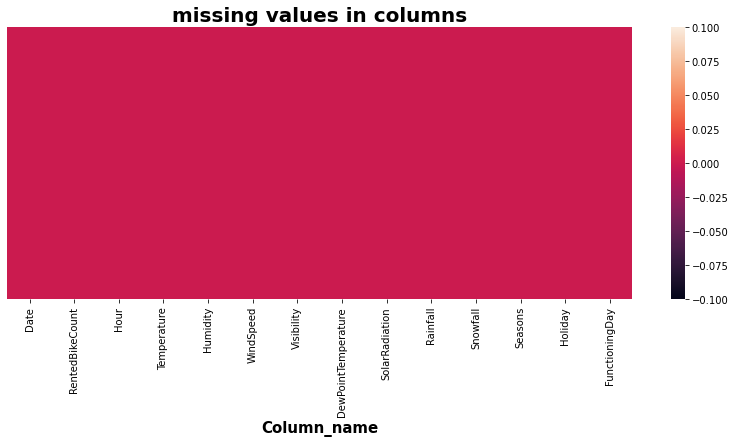

In [ ]:
#checkig for missing values
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),cbar=True, yticklabels=False)
plt.xlabel("Column_name",size=15,weight='bold')
plt.title("missing values in columns",fontweight='bold',size=20)
plt.show()

It seems that there is no missing values present  in dataset.

In [ ]:
# checking for null values
df.isnull().sum()

Date                   0
RentedBikeCount        0
Hour                   0
Temperature            0
Humidity               0
WindSpeed              0
Visibility             0
DewPointTemperature    0
SolarRadiation         0
Rainfall               0
Snowfall               0
Seasons                0
Holiday                0
FunctioningDay         0
dtype: int64

In [ ]:
#checking for duplicate values
duplicate_value=len(df[df.duplicated()])
print(duplicate_value)

0


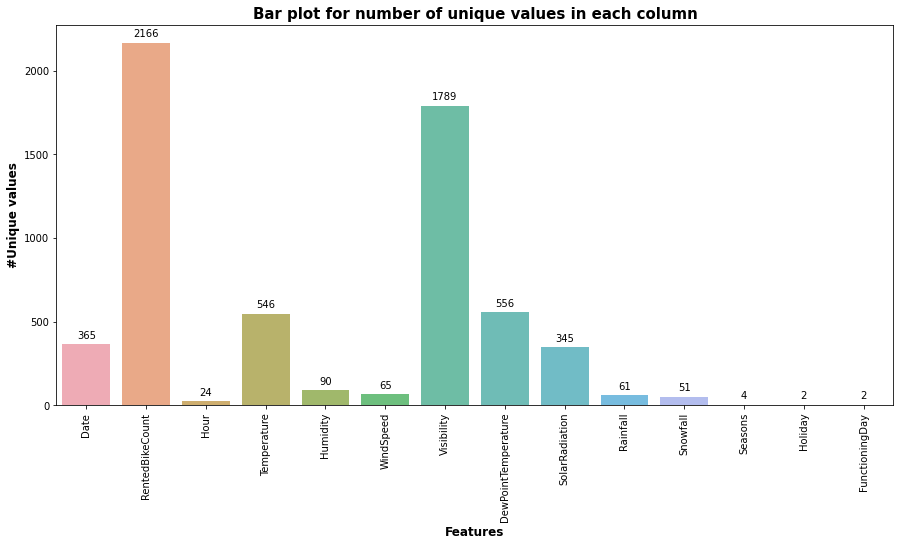

In [ ]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#converting date column to date formate
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#extracting day,month, day of week and weekdays/weekend from date column
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].apply(lambda x:x.month)
df['days_of_week']=df['Date'].dt.day_name()
df['weekdays_of_weekend']=df['days_of_week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
df.head()

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,month,days_of_week,weekdays_of_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [ ]:
#drop date and days_of_week column
df=df.drop(columns=['Date','days_of_week'],axis=1)

In [ ]:
df.head(3)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,month,weekdays_of_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


# **Exploratory Data Analysis**

**Month**

Text(0.5, 1.0, 'Rented bike count vs month')

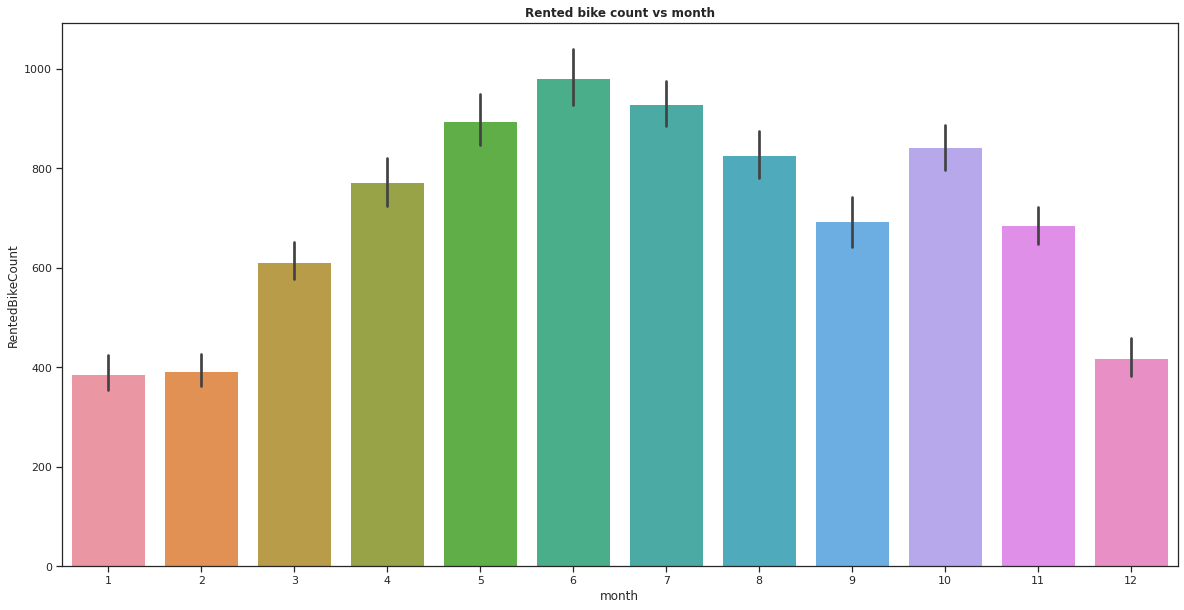

In [ ]:
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks")
sns.barplot(x='month',y='RentedBikeCount',data=df)
plt.title('Rented bike count vs month',fontweight='bold')



*   **From above graph it is clear that the from the month 5 to 10 demand was increases compared to the other month. or this is the summerr season.**



**Hour**

Text(0.5, 1.0, 'Rented bike count vs Hour')

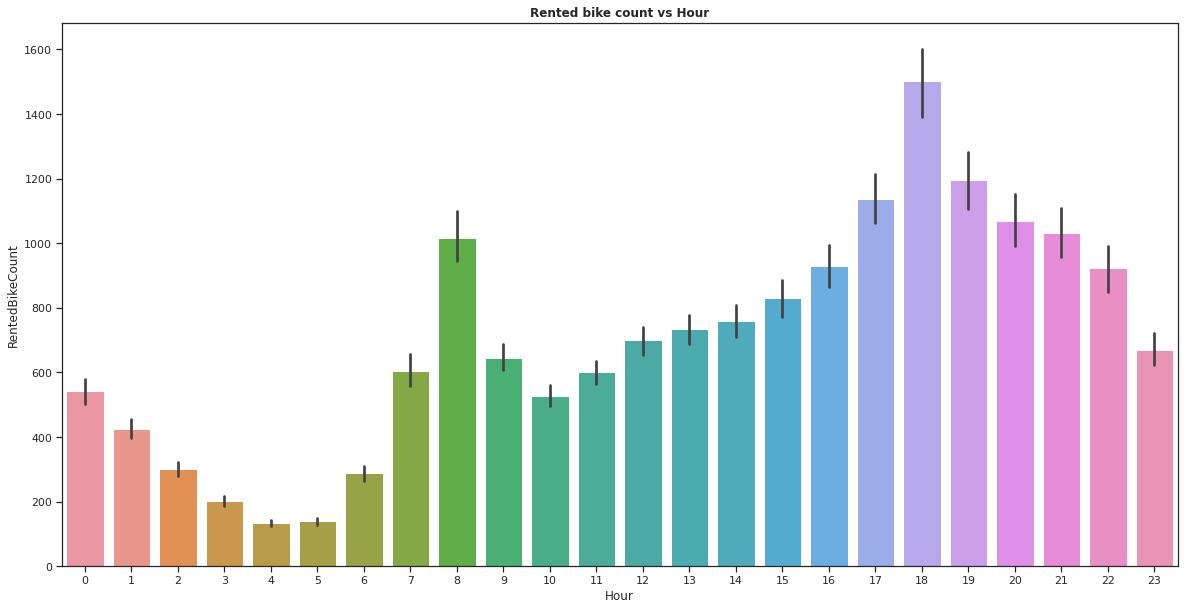

In [ ]:
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks")
sns.barplot(x='Hour',y='RentedBikeCount',data=df)
plt.title('Rented bike count vs Hour',fontweight='bold')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')

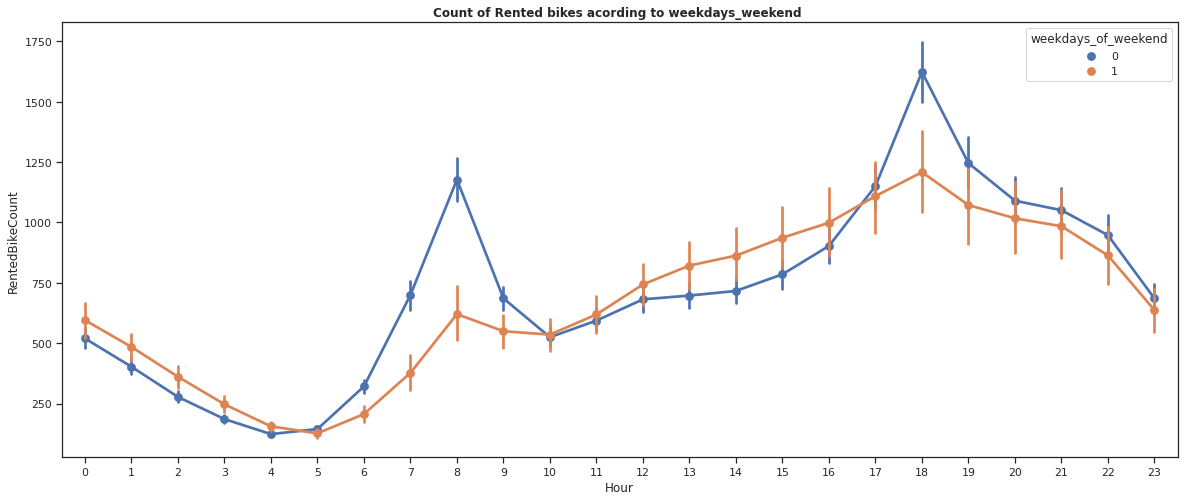

In [ ]:
plt.figure(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='RentedBikeCount',hue='weekdays_of_weekend')
plt.title('Count of Rented bikes acording to weekdays_weekend ',fontweight='bold')



*   **From the first graph we can say that peak time are 7 am to 9 am and from 5 pm demand is slightly increases.** 

*   **And from above point plot its is clear that the during weak days the demand of the bike is higher beacuse of the office time.** 



**FunctioningDay**

Text(0.5, 1.0, 'Rented bike count vs Functioning day')

<Figure size 720x720 with 0 Axes>

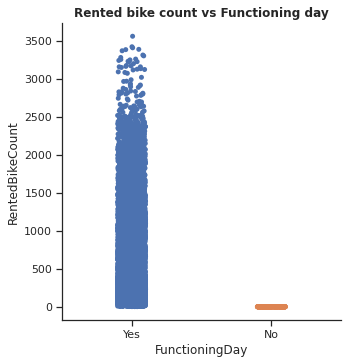

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x='FunctioningDay',y='RentedBikeCount',data=df)
plt.title('Rented bike count vs Functioning day',fontweight='bold')



*   **Above graph clearly shows that the, people don't use rented bike in no functionaning day.**


In [ ]:
df.head(1)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,month,weekdays_of_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


**Seasons**

Text(0.5, 1.0, 'Seasons vs Rented bike Count')

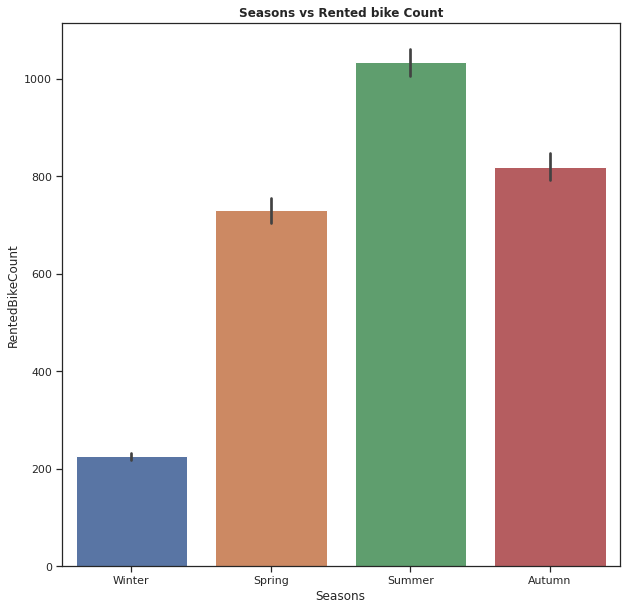

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Seasons',y='RentedBikeCount',data=df)
plt.title('Seasons vs Rented bike Count',fontweight='bold')



*   **In above graph wew can see that the during summer season demand of rented bike was increase.** 

*   **And during the the winter demand is very low.**



**Holidays**

Text(0.5, 1.0, 'Holiday vs Rented bike Count')

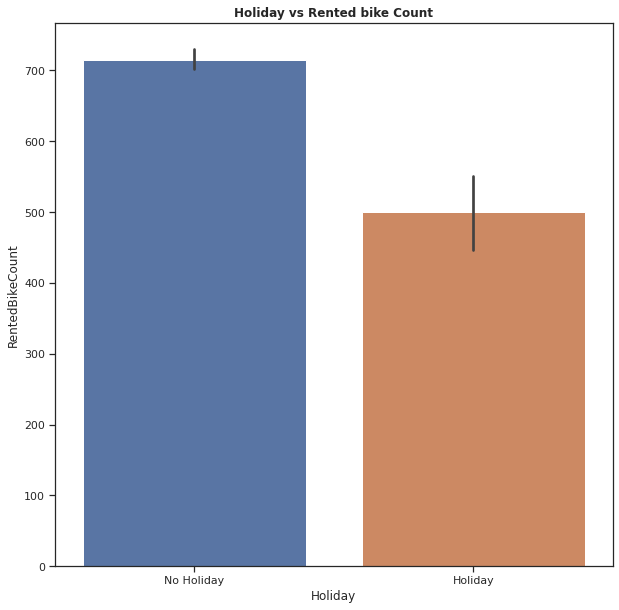

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Holiday',y='RentedBikeCount',data=df)
plt.title('Holiday vs Rented bike Count',fontweight='bold')



*   **From above graph it is clear that the during a holiday demand of rented bike was decrease compared to the no holidays.**

## **Categorical feature**

In [ ]:
cat_feature=df.select_dtypes(include='object')

In [ ]:
cat_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Seasons         8760 non-null   object
 1   Holiday         8760 non-null   object
 2   FunctioningDay  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


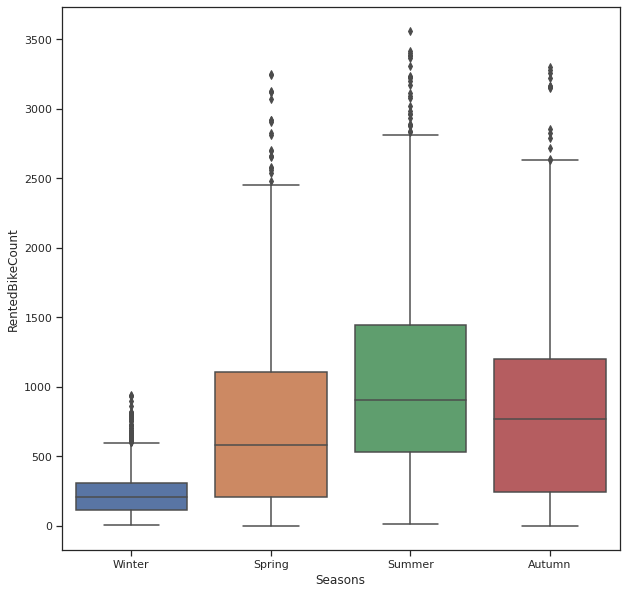

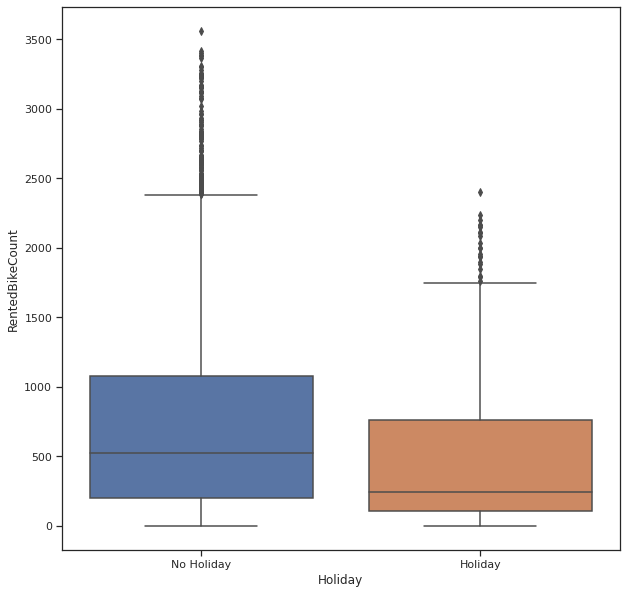

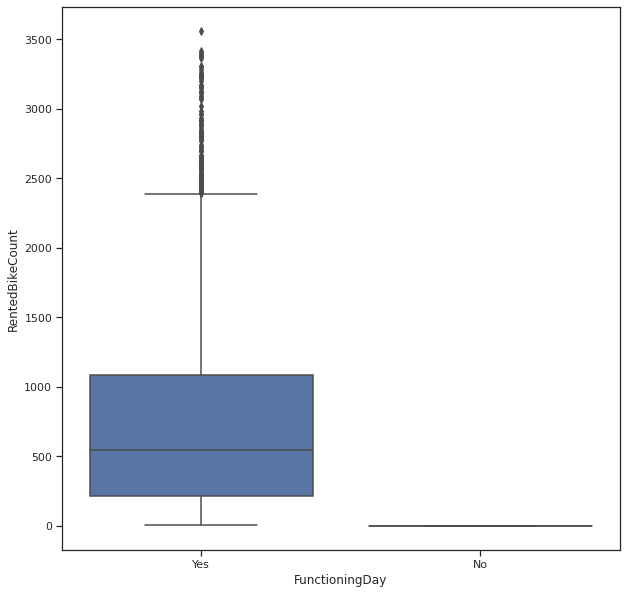

In [ ]:
#ploting box plot of ctaegorical column
for i in cat_feature:
  plt.figure(figsize=(10,10))
  sns.boxplot(x=df[i],y=df['RentedBikeCount'])
  plt.show()



*   **High demand on summer season and low in winter.**
*   **Sligthly high demand during no hilday.**
*   **Zero demand on no functioning day.**





## **Numerical feature**

In [ ]:
numeric_features=df.select_dtypes(exclude='object')

In [ ]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RentedBikeCount      8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   WindSpeed            8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   DewPointTemperature  8760 non-null   float64
 7   SolarRadiation       8760 non-null   float64
 8   Rainfall             8760 non-null   float64
 9   Snowfall             8760 non-null   float64
 10  month                8760 non-null   int64  
 11  weekdays_of_weekend  8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [ ]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
RentedBikeCount,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
WindSpeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
DewPointTemperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
SolarRadiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


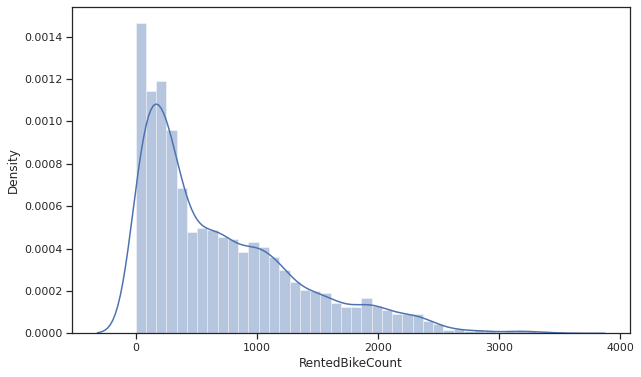

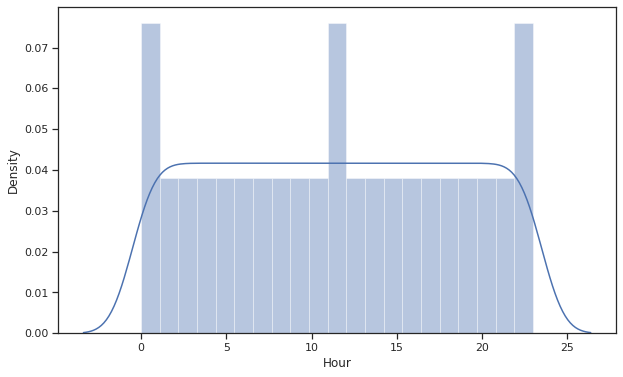

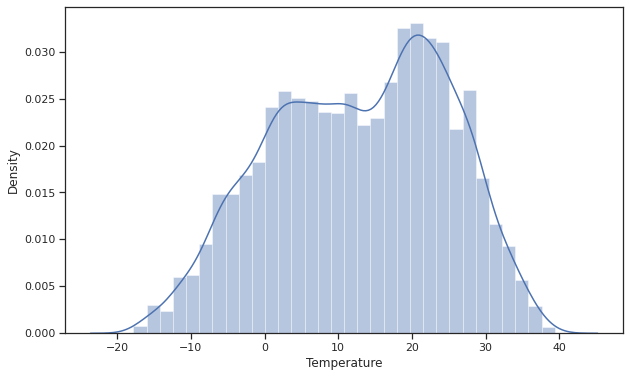

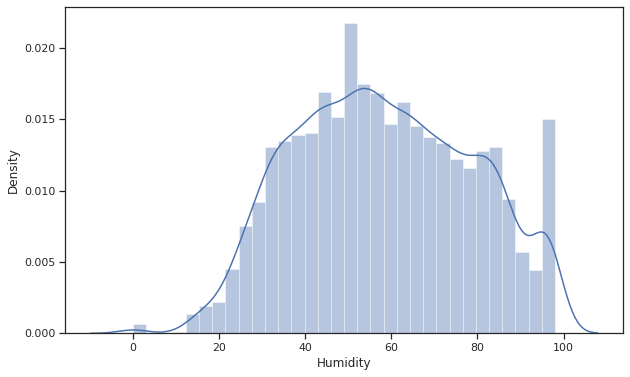

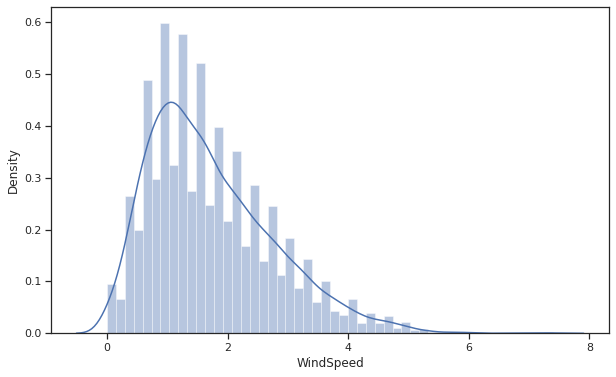

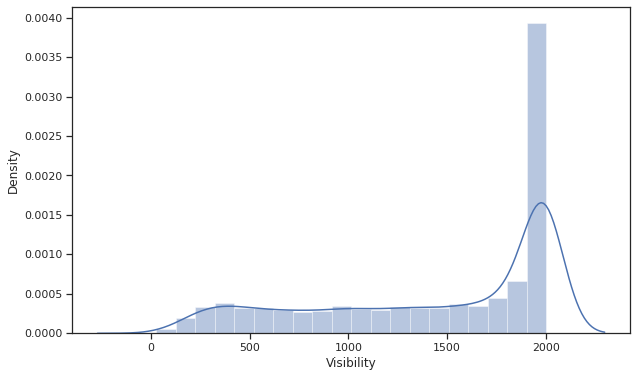

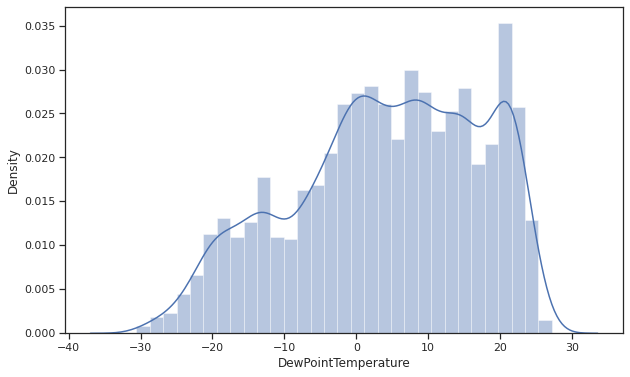

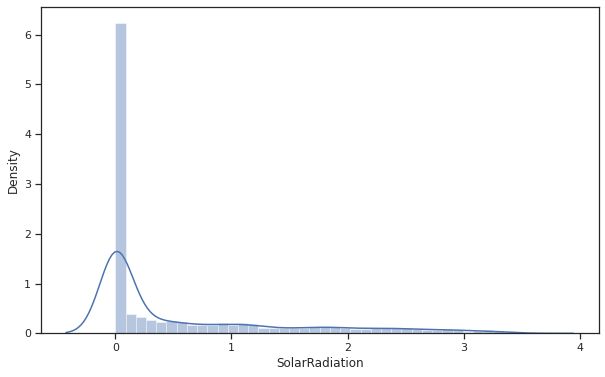

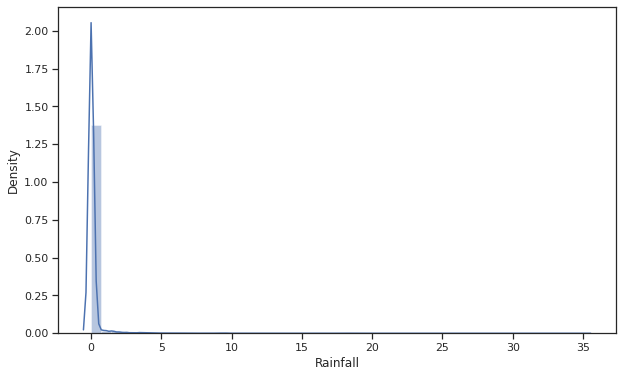

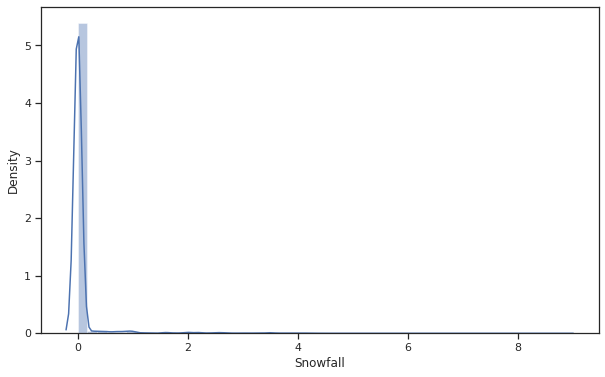

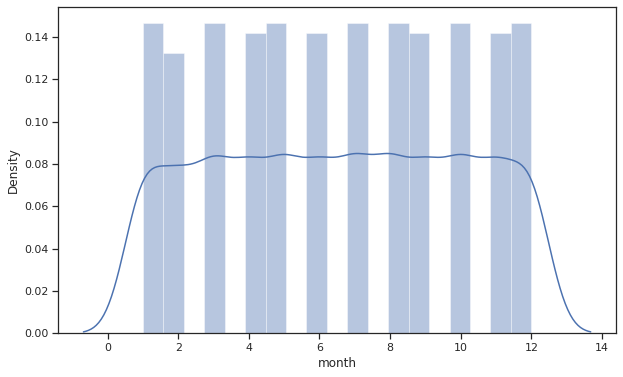

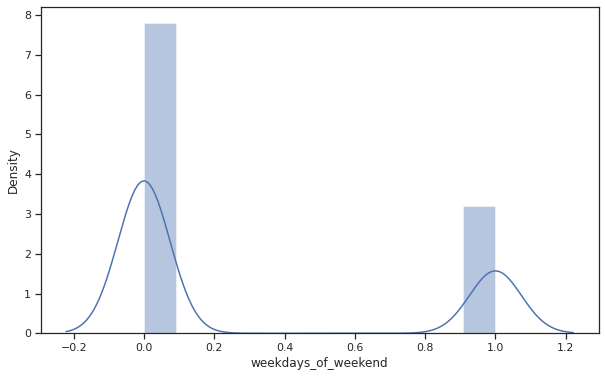

In [ ]:
#plot graph
for col in numeric_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()


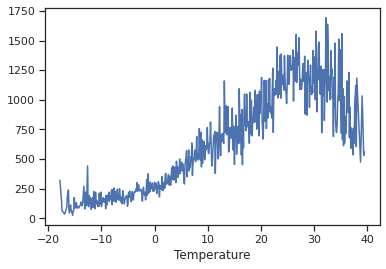

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['RentedBikeCount'].plot()

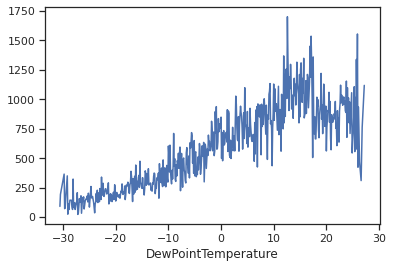

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df.groupby('DewPointTemperature').mean()['RentedBikeCount'].plot()



*   **We can say that the people like to ride bike during the pretty hot weather, around 30°C.**


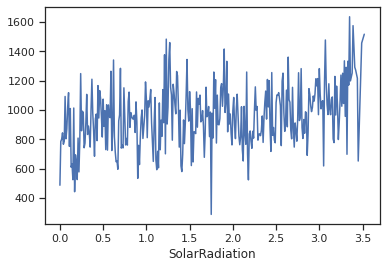

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('SolarRadiation').mean()['RentedBikeCount'].plot()



*   **from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**



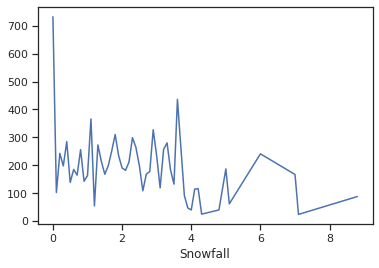

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['RentedBikeCount'].plot()



*   **Graph shows increase in snowfall demand was decreases.**



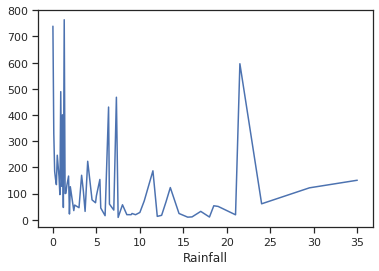

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['RentedBikeCount'].plot()



*   **just like snowfall, when rainfall is increases demand of rented bike is decreases.**



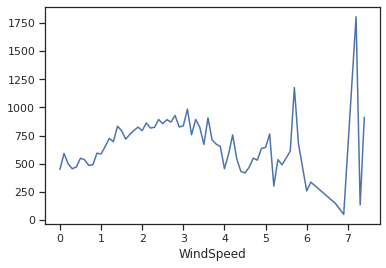

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('WindSpeed').mean()['RentedBikeCount'].plot()

### **Regression plot**

**Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss.**

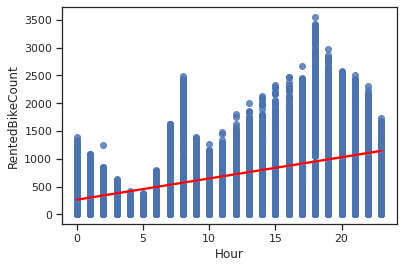

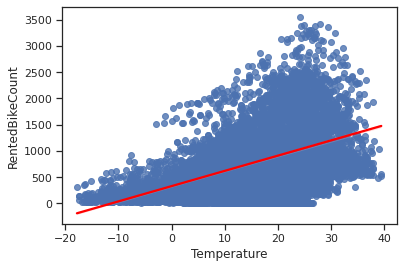

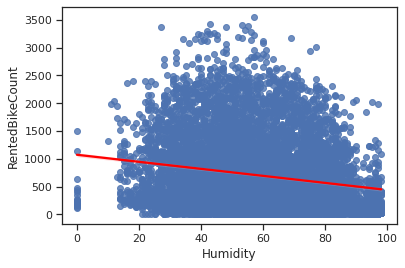

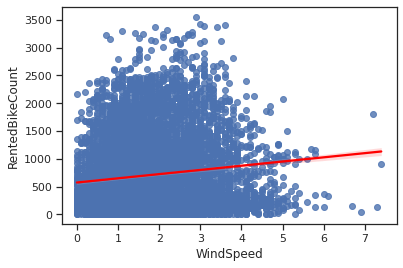

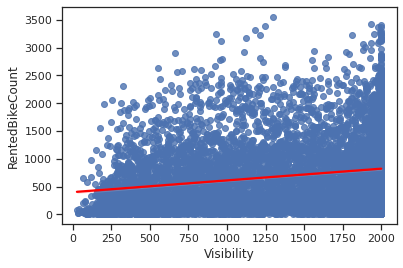

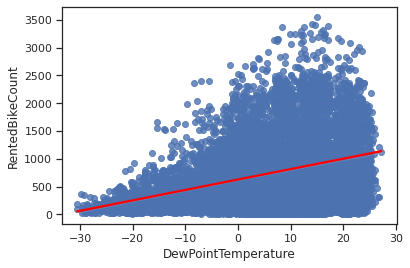

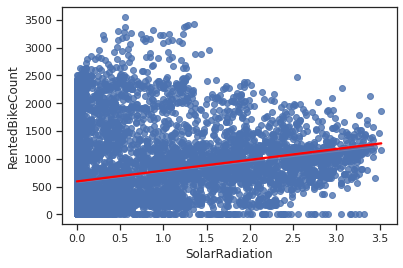

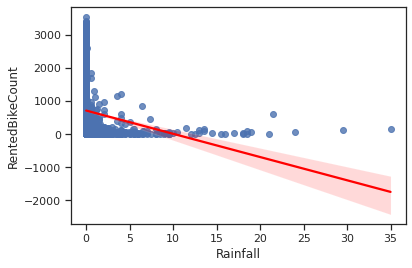

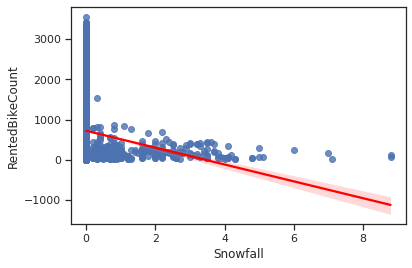

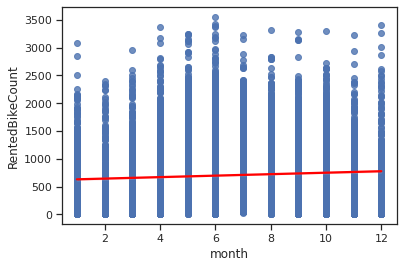

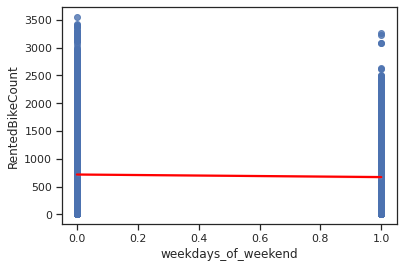

In [ ]:
for i in numeric_features[:]:
  if i == 'RentedBikeCount':
    pass
  else:
    sns.regplot(x=df[i],y=df["RentedBikeCount"],line_kws={"color": "red"})
  plt.show()

*   **From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.**

* **which means the rented bike count increases with increase of these features.**  

*  **'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.** 
 

# **Visulizing distribution**

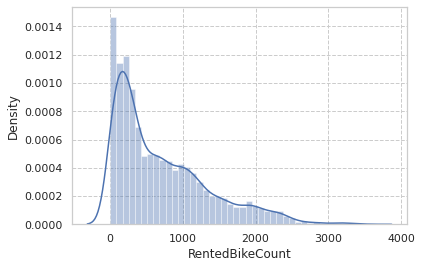

In [ ]:
#Let's visulizing distribution
sns.set_style("whitegrid",{'grid.linestyle': '--'}) # ploting graph in workbook
sns.distplot(df['RentedBikeCount'])

we can see that our graph is positive skewed, means more outliers are right side, so need tansformation.

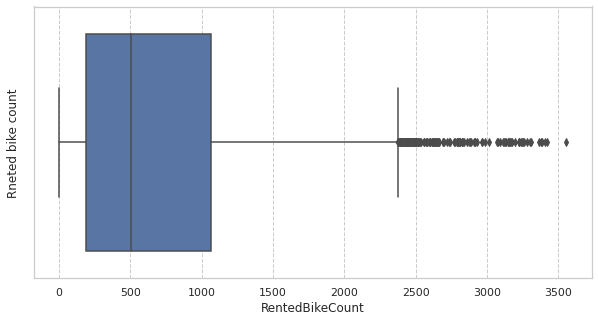

In [ ]:
#lets check for outliers
#for outlier detection we are using box plot
plt.figure(figsize=(10,5))
sns.boxplot(x='RentedBikeCount',data=df)
plt.ylabel('Rneted bike count')
plt.show()

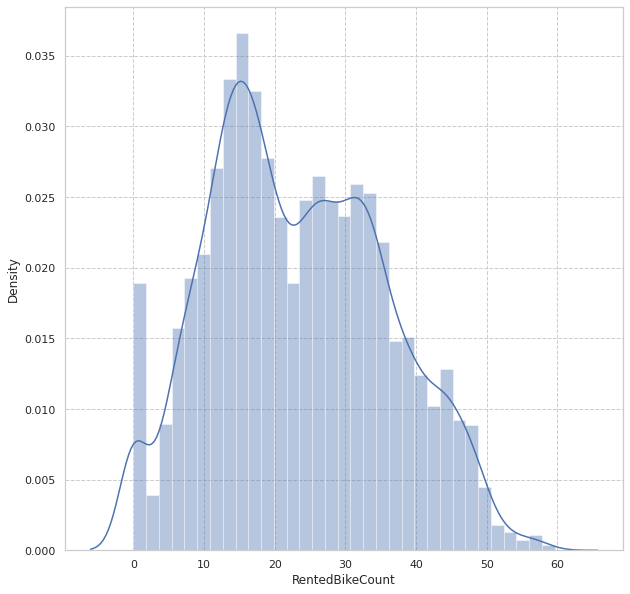

In [ ]:
#here we are using square root transformation
plt.figure(figsize=(10,10))
sns.distplot(np.sqrt(df['RentedBikeCount']))

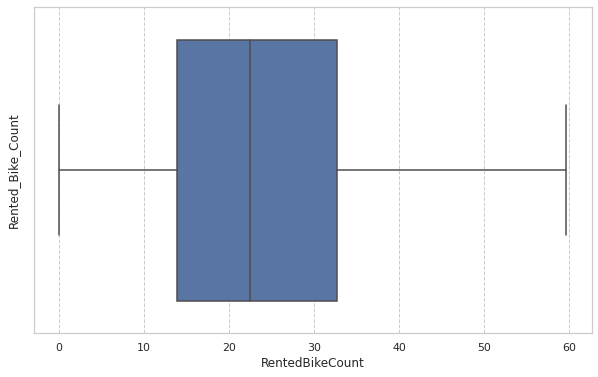

In [ ]:
#ploting boxplot for outliers 
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['RentedBikeCount']))
plt.show()



*   **After applying squart root transformation there is no outliers present in rented bike count column**


# **Checking for multicolinearity**

In [ ]:
# #checking corealtion using heatmap
# plt.figure(figsize=(15,7))
# sns.heatmap(df.corr(),cmap='Blues',annot=True)

NameError: ignored

In [ ]:
#checking counts on functioning days
df['FunctioningDay'].value_counts()

Yes    8465
No      295
Name: FunctioningDay, dtype: int64

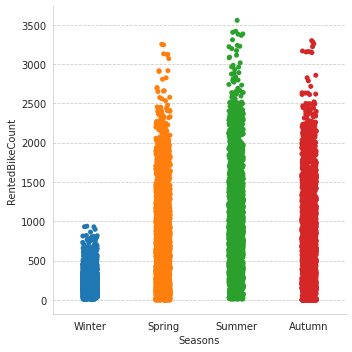

In [ ]:
#graph plot for more understaning
sns.catplot(x='Seasons',y='RentedBikeCount',data=df)

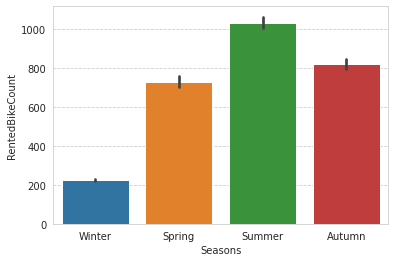

In [ ]:
#graph plot for more info.
sns.barplot(x='Seasons',y='RentedBikeCount',data=df)

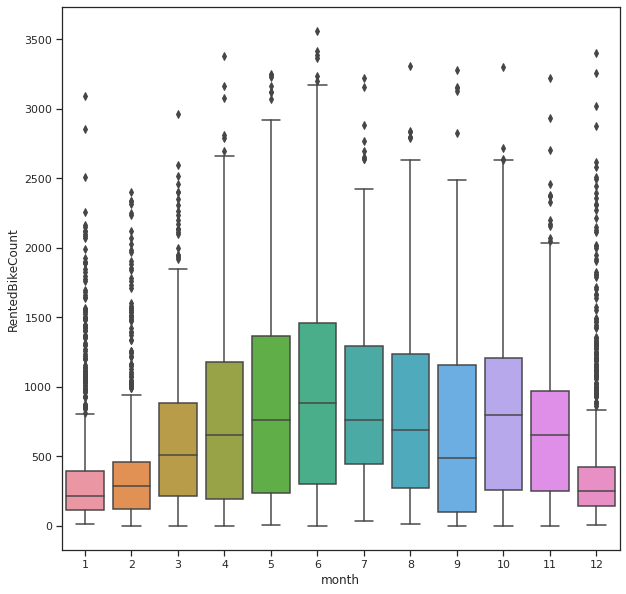

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='month',y='RentedBikeCount',data=df)
plt.show()

now it's clear that the in month of december,january,february demand was decreases,means it's a winter season. 
And in month of may,june,july demand is increases, menas during summer demand is increases.

In [ ]:
# #ploting line graph
# # group by Hrs and get average Bikes rented, and precent change
# avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# # plot average rent over time(hrs)
# plt.figure(figsize=(20,4))
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)));
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

**One hot label encoding for categorical columns**

In [ ]:
#label encoder library
from sklearn.preprocessing import LabelEncoder

In [ ]:
#object of label encoding
le=LabelEncoder()

df['Holiday']=le.fit_transform(df['Holiday'])
df['FunctionaningDay']=le.fit_transform(df['FunctioningDay'])
df['Seasons']=le.fit_transform(df['Seasons'])

**Checking for multicolinearity**

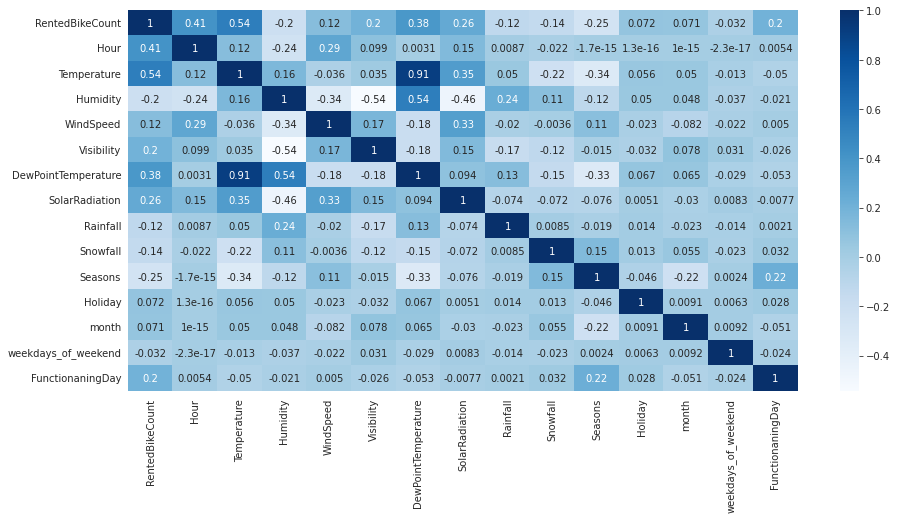

In [ ]:
#checking corealtion using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [ ]:
#Calculating library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,RentedBikeCount,4.879303
1,Hour,5.133463
2,Temperature,52.045574
3,Humidity,29.981875
4,WindSpeed,4.872972
5,Visibility,9.381067
6,DewPointTemperature,30.571805
7,SolarRadiation,2.920880
8,Rainfall,1.107322
9,Snowfall,1.137324


In [ ]:
# removing temperature column due to high multicolinearity
df.drop(['Temperature'],axis=1, inplace=True)

In [ ]:
df.head(2)

,RentedBikeCount,Hour,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,month,weekdays_of_weekend,FunctionaningDay
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,Yes,1,0,1
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,Yes,1,0,1


Text(0.5, 1.0, 'Graph of Rented bike count vs Hour')

<Figure size 720x720 with 0 Axes>

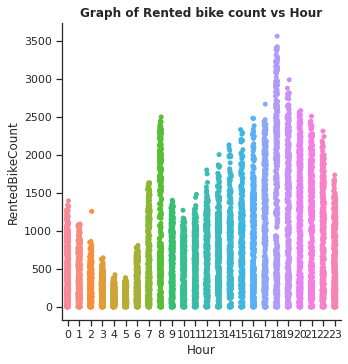

In [ ]:
#now ploting more graph to know more about that

#hour vs RentedBikePlot
plt.figure(figsize=(10,10))
sns.set_theme(style="ticks")
sns.catplot(x='Hour',y='RentedBikeCount',data=df)
plt.title('Graph of Rented bike count vs Hour',fontweight='bold')

we can see that high demand of rented bike near to 6 o'clock

Text(0.5, 1.0, 'Graph of Snowfall vs Rented Bike Count')

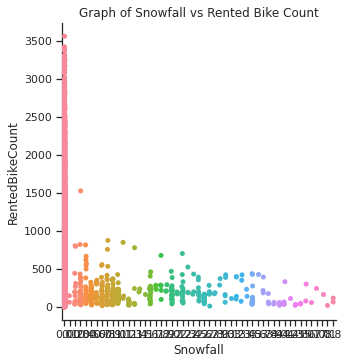

In [ ]:
#graph of Rented bike count vs Snowfall
sns.catplot(x='Snowfall',y='RentedBikeCount',data=df)
plt.title("Graph of Snowfall vs Rented Bike Count")

Now it's clear that the demand is decrease with increasing snowfall.

Text(0.5, 1.0, 'Graph of Holiday vs Rented Bike Count')

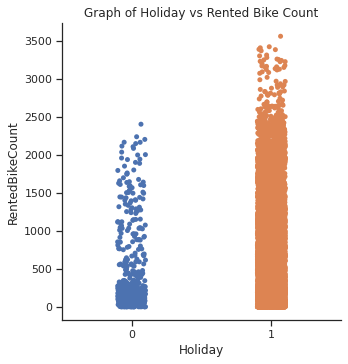

In [ ]:
#graph of Rented bike count vs Holidays
sns.catplot(x='Holiday',y='RentedBikeCount',data=df)
plt.title("Graph of Holiday vs Rented Bike Count")

so, we cacn say that during non-holiday(working day) demand was increase.

Text(0.5, 1.0, 'Graph of Rainfall vs Rented Bike Count')

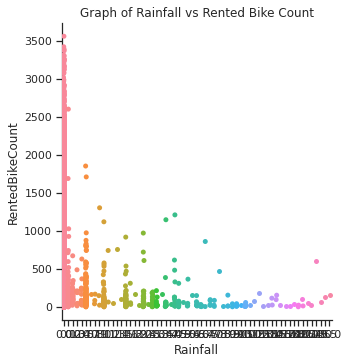

In [ ]:
#graph of Rented bike vs rainfall
sns.catplot(x='Rainfall',y='RentedBikeCount',data=df)
plt.title("Graph of Rainfall vs Rented Bike Count")

Graph shows increases in rainfall demand was decrease.